In [5]:
import numpy as np
max_dist_from_goal = 100
x = np.arange(-100, 150, 1)
y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(
            5 / max_dist_from_goal)), -1, 1)

/tmp/ipykernel_392197/2511889577.py:4: RuntimeWarning: divide by zero encountered in log
  y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(
/tmp/ipykernel_392197/2511889577.py:4: RuntimeWarning: invalid value encountered in log
  y = np.clip(1 - (np.log(x/ max_dist_from_goal) / np.log(


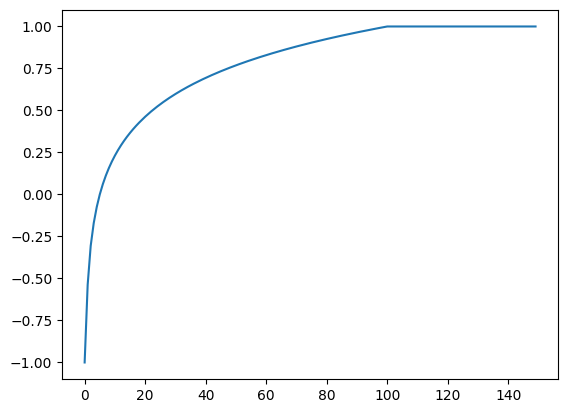

In [6]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()

In [10]:
def log_precision(x, x_goal=0.8, x_max=16) -> float:

    epsilon = 0.001  # Protection against log(0.0)
    return 1 - np.clip((np.log(max(x, epsilon) / x_max) / np.log(max(x_goal, epsilon) / x_max)), 0, 1)
x = np.arange(-20, 20, 1)
y = np.array([-log_precision(i) for i in x])

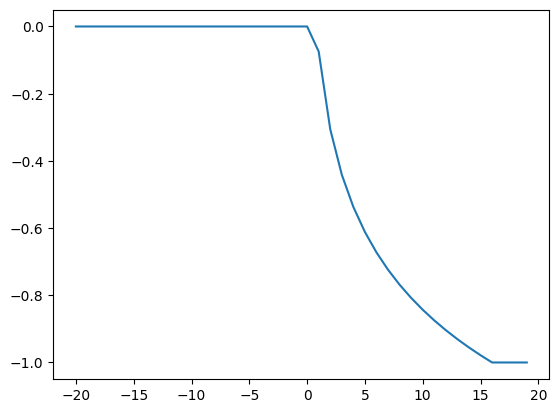

In [11]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.show()